# Travel Destination Recommendation System Notebook

#### Authors
* 1
* 2 
* 3
* 4
* 5
* 6


## Problem Statement

The goal is to build a machine learning model that can predict hotel ratings based on customer reviews, budget, specific locations, and the type of residence. The dataset is scraped from TripAdvisor and it contains information about various hotels, including their ratings, reviews, amenities, pricing, geographical coordinates, and residence types (e.g., hotel, bed and breakfast, specialty lodging). By analyzing the text reviews along with these additional factors, the objective is to develop a model that can accurately predict the ratings of new, unseen hotels based on customer reviews, budget constraints, location preferences, and residence type.

Approach:

Data Preprocessing: Clean and preprocess the text reviews by removing stopwords, punctuation, and performing tokenization. Convert the text data into a numerical representation suitable for modeling. Handle missing values, if any, in the budget, location, and residence type columns.

Feature Engineering: Extract additional features from the dataset, such as review sentiment scores, review length, and any other relevant information. Engineer new features related to budget, location, and residence type, such as price range categories, geographical distance from landmarks, and one-hot encoding of residence types.

Model Selection: Experiment with different supervised learning models, such as linear regression, decision trees, random forests, or neural networks, to find the best model for predicting hotel ratings considering customer reviews, budget, location, and residence type. Evaluate the models using appropriate evaluation metrics like mean squared error (MSE) or mean absolute error (MAE).

Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected model on the training set and evaluate its performance on the testing set. Fine-tune the model parameters to improve its accuracy. Perform cross-validation to assess the model's generalization capabilities.

## Objectives

## Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import json
import glob
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import scipy.stats as stats





In [2]:
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file, encoding='utf-8') as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)


In [3]:
json_files = [r'..\Data\drc.json',r'..\Data\egypt.json', r'..\Data\ethiopia.json',
                r'..\Data\kenya.json', r'..\Data\Madagascar.json', r'..\Data\morocco.json',
                r'..\Data\nigeria.json', r'..\Data\rwanda.json', r'..\Data\seychelles.json',
                r'..\Data\tanzania.json', r'..\Data\uganda.json', r'..\Data\namibia.json',
                '..\Data\south_africa.json', '..\Data\malawi.json', r'..\Data\Senegal.json',
                r'..\Data\zambia.json', r'..\Data\Ghana.json', r'..\Data\Botswana.json', 
                r'..\Data\capeverde.json' ]
df = read_json_files(json_files)
df.head()

,id,type,category,subcategories,name,locationString,description,image,photoCount,awards,...,establishmentTypes,ownersTopReasons,localLangCode,guideFeaturedInCopy,rentalDescriptions,photos,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,2704993,ATTRACTION,attraction,[Nature & Parks],Congoloisirs,Kinshasa,None,https://media-cdn.tripadvisor.com/media/photo-...,9,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1536776,ATTRACTION,attraction,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,https://media-cdn.tripadvisor.com/media/photo-...,3,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13203729,ATTRACTION,attraction,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,https://media-cdn.tripadvisor.com/media/photo-...,12,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8661504,HOTEL,hotel,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,https://media-cdn.tripadvisor.com/media/photo-...,79,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10414108,HOTEL,hotel,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,https://media-cdn.tripadvisor.com/media/photo-...,109,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#reviews = pd.read_csv(r"..\Data\.reviews_data.csv", index_col=0)
#reviews

In [5]:
#reviews['lang']

In [6]:
#reviews.columns

In [7]:
#reviews['user'][2000]

In [8]:
# Rename the column at a specific index
#reviews.rename(columns={reviews.columns[0]: 'userId'}, inplace=True)


In [9]:
#reviews['userId'].duplicated().sum()

In [10]:
#reviews = reviews[['userId', 'locationId', 'title', 'rating', 'text', 'placeInfo' ]]
#reviews

In [11]:
# Split the dictionary-like item into separate columns
#item_info = reviews['placeInfo'].apply(lambda x: pd.Series(eval(x)))
#item_info.drop(columns='id', inplace=True)

# Concatenate the new columns with the original DataFrame
#reviews = pd.concat([reviews, item_info], axis=1)
#reviews.head()

In [12]:

# Split the dictionary-like item into separate columns
#address_info = reviews['addressObj'].apply(pd.Series)

# Concatenate the new columns with the original DataFrame
#reviews = pd.concat([reviews, address_info], axis=1)
#reviews.head()


In [13]:
#reviews.isnull().sum()

In [14]:
#reviews['address'][0]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

In [16]:
# converting to csv
# df.to_csv('compiled_data.csv', index=False)

In [17]:
df.columns

Index(['id', 'type', 'category', 'subcategories', 'name', 'locationString',
       'description', 'image', 'photoCount', 'awards', 'rankingPosition',
       'rating', 'rawRanking', 'phone', 'address', 'addressObj', 'localName',
       'localAddress', 'email', 'latitude', 'longitude', 'webUrl', 'website',
       'rankingString', 'rankingDenominator', 'neighborhoodLocations',
       'nearestMetroStations', 'ancestorLocations', 'ratingHistogram',
       'numberOfReviews', 'reviewTags', 'reviews', 'booking', 'offerGroup',
       'subtype', 'hotelClass', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'roomTips', 'checkInDate', 'checkOutDate', 'offers',
       'hotelClassAttribution', 'isClosed', 'isLongClosed', 'openNowText',
       'cuisines', 'mealTypes', 'dishes', 'features', 'dietaryRestrictions',
       'hours', 'menuWebUrl', 'establishmentTypes', 'ownersTopReasons',
       'localLangCode', 'guideFeaturedInCopy', 'rentalDescriptions', 'photos',
       'bedroomInfo', '

## Data Cleaning /  EDA and Data Munging

#### Removing Irrelevant columns

There are several columns and attributes that are not useful for our analysis. These include **'image'**, **'photoCount'**, **'awards'**, **'phone'**, **'address'** , **'email'** **'webUrl'**, **'website'** **'neighborhoodLocations'**, **'nearestMetroStations'**, **'booking'**, **'offerGroup'**, **'subtype'**, **'hotelClass'**, **'roomTips'**, **'checkInDate'**, **'checkOutDate'**, **'offers'**, **'hotelClassAttribution'**, **'localLangCode'**, **'isClosed'**, **'isLongClosed'**, **'openNowText'**, **'dietaryRestrictions'**, **'hours'**, **'menuWebUrl'**, **'establishmentTypes'**, **'ownersTopReasons'**, **'guideFeaturedInCopy'**, **'rentalDescriptions'** and **'photos'**. 
Some columns have the similar attributes and therefore we drop them to be be left with one. This include **type** and **category**, **ancestorLocations**, **localAddress** and **'name'** and **localName**.

In [18]:
columns_to_drop = ['image', 'photoCount', 'awards', 'phone', 'address', 'email', 'localAddress',
                   'webUrl', 'website', 'neighborhoodLocations', 'nearestMetroStations', 'ancestorLocations',
                   'booking', 'offerGroup', 'subtype', 'hotelClass', 'roomTips', 'checkInDate', 'category',
                   'checkOutDate', 'offers', 'hotelClassAttribution', 'localLangCode', 'isClosed', 'ratingHistogram',
                   'isLongClosed', 'openNowText', 'dietaryRestrictions', 'hours', 'menuWebUrl', 'localName', 
                   'establishmentTypes', 'ownersTopReasons', 'guideFeaturedInCopy', 'rentalDescriptions','photos']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,priceLevel,priceRange,cuisines,mealTypes,dishes,features,bedroomInfo,bathroomInfo,bathCount,baseDailyRate
0,2704993,ATTRACTION,[Nature & Parks],Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1536776,ATTRACTION,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,1.0,5.0,2.751658,"{'street1': '', 'street2': '', 'city': None, '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13203729,ATTRACTION,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8661504,HOTEL,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10414108,HOTEL,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rankingPosition', 'rating', 'rawRanking', 'addressObj', 'latitude',
       'longitude', 'rankingString', 'rankingDenominator', 'numberOfReviews',
       'reviewTags', 'reviews', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'cuisines', 'mealTypes', 'dishes', 'features',
       'bedroomInfo', 'bathroomInfo', 'bathCount', 'baseDailyRate'],
      dtype='object')

### Handling Missing values

In [20]:
# define a function that finds the percentage of missing values of columns with missing values

def missing_values_percentage(df):
    return df.isnull().sum() / len(df) * 100

column_percentages = missing_values_percentage(df)
columns_with_missing_values = column_percentages[column_percentages > 0]
columns_with_missing_values.sort_values(ascending=False)


features              98.839156
dishes                98.839156
mealTypes             98.839156
cuisines              98.839156
baseDailyRate         96.461659
bathCount             96.263534
bathroomInfo          96.263534
bedroomInfo           96.263534
priceRange            60.545262
priceLevel            60.288537
numberOfRooms         52.349593
description           43.830227
amenities             27.011943
rankingDenominator    25.856680
rankingString         25.856680
rawRanking            25.856680
rankingPosition       25.856680
rating                25.477174
longitude             16.000670
latitude              16.000670
locationString         3.736466
reviewTags             3.736466
addressObj             3.736466
subcategories          3.736466
dtype: float64

Some columns such as features, dishes, mealTypes, cuisines, baseDailyRate, bathCount, bathroomInfo, bedroomInfo have missing values above 90 percent. We opt to drop them.

In [21]:
above_90_missing_col = ['features', 'dishes', 'mealTypes', 'cuisines', 'baseDailyRate', 'bathCount', 'bathroomInfo', 'bedroomInfo']
df.drop(columns=above_90_missing_col, inplace=True)
df.head()

,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,longitude,rankingString,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange
0,2704993,ATTRACTION,[Nature & Parks],Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,NaN,#17 of 105 things to do in Kinshasa,105,9,[],[],NaN,NaN,NaN,NaN
1,1536776,ATTRACTION,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,1.0,5.0,2.751658,"{'street1': '', 'street2': '', 'city': None, '...",...,NaN,#1 of 4 things to do in Orientale Province,4,2,[],[],NaN,NaN,NaN,NaN
2,13203729,ATTRACTION,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,15.308700,#21 of 105 things to do in Kinshasa,105,3,[],[],NaN,NaN,NaN,NaN
3,8661504,HOTEL,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,29.434310,#2 of 3 Specialty lodging in Rumangabo,3,34,[],[],"[Restaurant, Mountain View]",6.0,None,None
4,10414108,HOTEL,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,29.117218,#1 of 17 Specialty lodging in Goma,17,29,"[{'text': 'gorilla trekking', 'reviews': 3}, {...",[],"[Multilingual Staff, Restaurant, Bar/Lounge, F...",6.0,None,None


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35836 non-null  object 
 1   type                35836 non-null  object 
 2   subcategories       34497 non-null  object 
 3   name                35836 non-null  object 
 4   locationString      34497 non-null  object 
 5   description         20129 non-null  object 
 6   rankingPosition     26570 non-null  float64
 7   rating              26706 non-null  float64
 8   rawRanking          26570 non-null  float64
 9   addressObj          34497 non-null  object 
 10  latitude            30102 non-null  float64
 11  longitude           30102 non-null  float64
 12  rankingString       26570 non-null  object 
 13  rankingDenominator  26570 non-null  object 
 14  numberOfReviews     35836 non-null  int64  
 15  reviewTags          34497 non-null  object 
 16  revi

In [23]:
#columns_with_missing_values.sort_values(ascending=False)

##### **price range** and **price level**

In [24]:
#previewing price level and price range
df.head()[['priceLevel', 'priceRange', 'type']]


,priceLevel,priceRange,type
0,NaN,NaN,ATTRACTION
1,NaN,NaN,ATTRACTION
2,NaN,NaN,ATTRACTION
3,None,None,HOTEL
4,None,None,HOTEL


The price level column has only dollar signs and null values, therefore we will drop it. The price range column has a range in Kenya Shillings of the amount tourists can spend in the travel destination. We create two new columns with an upper and lower limit and then fill the missing valuea with the minimum amount if the type is attraction and the mean value if the type is hotel.

In [25]:
# Split the PriceRange column into UpperLimit and LowerLimit columns
df[['LowerPrice', 'UpperPrice']] = df['priceRange'].str.replace('KES', '').str.split(' - ', expand=True)
# Convert UpperLimit and LowerLimit columns to numeric  
df['LowerPrice'] = df['LowerPrice'].str.replace(',', '').astype(float)
df['UpperPrice'] = df['UpperPrice'].str.replace(',', '').astype(float)
# Fill missing values with minimum in 'LowerLimit' and 'UpperLimit' columns for type 'ATTRACTION'
df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'] = df.loc[df['type'] == 'ATTRACTION', 'LowerPrice'].fillna(df['LowerPrice'].min())
df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'] = df.loc[df['type'] == 'ATTRACTION', 'UpperPrice'].fillna(df['UpperPrice'].min())

# Fill missing values with mean in 'LowerLimit' and 'UpperLimit' columns for type 'HOTEL'
df.loc[df['type'] == 'HOTEL', 'LowerPrice'] = df.loc[df['type'] == 'HOTEL', 'LowerPrice'].fillna(df['LowerPrice'].mean())
df.loc[df['type'] == 'HOTEL', 'UpperPrice'] = df.loc[df['type'] == 'HOTEL', 'UpperPrice'].fillna(df['UpperPrice'].mean())
df.head()

,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,2704993,ATTRACTION,[Nature & Parks],Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,105,9,[],[],NaN,NaN,NaN,NaN,141.000000,281.000000
1,1536776,ATTRACTION,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,1.0,5.0,2.751658,"{'street1': '', 'street2': '', 'city': None, '...",...,4,2,[],[],NaN,NaN,NaN,NaN,141.000000,281.000000
2,13203729,ATTRACTION,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,105,3,[],[],NaN,NaN,NaN,NaN,141.000000,281.000000
3,8661504,HOTEL,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,3,34,[],[],"[Restaurant, Mountain View]",6.0,None,None,13777.392428,23045.636246
4,10414108,HOTEL,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,17,29,"[{'text': 'gorilla trekking', 'reviews': 3}, {...",[],"[Multilingual Staff, Restaurant, Bar/Lounge, F...",6.0,None,None,13777.392428,23045.636246


#### **amenities**

In [26]:
df.tail(10)[['amenities', 'type' ]]

,amenities,type
35826,[],HOTEL
35827,[],HOTEL
35828,"[Kids Activities, Paid Wifi]",HOTEL
35829,[],HOTEL
35830,[],HOTEL
35831,"[Shuttle Bus Service, Restaurant, Bar/Lounge, ...",HOTEL
35832,[],HOTEL
35833,"[Kids Activities, Free parking, Airport transp...",HOTEL
35834,"[Kids Activities, Free parking, Airport transp...",HOTEL
35835,[],HOTEL


In [27]:
df['amenities'] = df['amenities'].apply(
    lambda x: ', '.join(
        [
            '{:.2f}'.format(i) if isinstance(i, (float, int)) else str(i)
            for i in x
        ]
    )
    if isinstance(x, (list, tuple))
    else x
)
df['amenities']


0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                Restaurant, Mountain View
4        Multilingual Staff, Restaurant, Bar/Lounge, Fr...
                               ...                        
35831    Shuttle Bus Service, Restaurant, Bar/Lounge, P...
35832                                                     
35833    Kids Activities, Free parking, Airport transpo...
35834    Kids Activities, Free parking, Airport transpo...
35835                                                     
Name: amenities, Length: 35836, dtype: object

In [28]:
df['type'].value_counts()

HOTEL              24817
ATTRACTION          9264
VACATION_RENTAL     1339
RESTAURANT           416
Name: type, dtype: int64

In [29]:
# Replace NaN values with "bathroom only" where type is "attraction"
df.loc[(df['type'] == 'RESTAURANT') & (df['amenities'].isna()), 'amenities'] = 'restaurant'
df.loc[(df['type'] == 'ATTRACTION') & (df['amenities'].isna()), 'amenities'] = 'bathroom only'
# Define the value to populate empty lists
new_data = ['restaurant', 'bathroom', 'room']  # Replace with your desired data

# Populate empty lists using list comprehension
df['amenities'] = [new_data if isinstance(value, list) and not value else value for value in df['amenities']]
df.head()

,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,rankingDenominator,numberOfReviews,reviewTags,reviews,amenities,numberOfRooms,priceLevel,priceRange,LowerPrice,UpperPrice
0,2704993,ATTRACTION,[Nature & Parks],Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,105,9,[],[],bathroom only,NaN,NaN,NaN,141.000000,281.000000
1,1536776,ATTRACTION,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,1.0,5.0,2.751658,"{'street1': '', 'street2': '', 'city': None, '...",...,4,2,[],[],bathroom only,NaN,NaN,NaN,141.000000,281.000000
2,13203729,ATTRACTION,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,105,3,[],[],bathroom only,NaN,NaN,NaN,141.000000,281.000000
3,8661504,HOTEL,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,3,34,[],[],"Restaurant, Mountain View",6.0,None,None,13777.392428,23045.636246
4,10414108,HOTEL,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,17,29,"[{'text': 'gorilla trekking', 'reviews': 3}, {...",[],"Multilingual Staff, Restaurant, Bar/Lounge, Fr...",6.0,None,None,13777.392428,23045.636246


In [30]:
df['amenities'].isna().sum()

0

#### **rankingDenominator**, **rankingString**, **rawRanking**, **rankingPosition** and **rating**

In [31]:
df.head()[['rankingDenominator', 'rankingString', 'rawRanking', 'rankingPosition', 'rating', 'type']]

,rankingDenominator,rankingString,rawRanking,rankingPosition,rating,type
0,105,#17 of 105 things to do in Kinshasa,2.778074,17.0,4.0,ATTRACTION
1,4,#1 of 4 things to do in Orientale Province,2.751658,1.0,5.0,ATTRACTION
2,105,#21 of 105 things to do in Kinshasa,2.773659,21.0,5.0,ATTRACTION
3,3,#2 of 3 Specialty lodging in Rumangabo,3.351389,2.0,4.5,HOTEL
4,17,#1 of 17 Specialty lodging in Goma,3.464931,1.0,5.0,HOTEL


In [32]:
df[['rankingString', 'type', 'locationString']]

,rankingString,type,locationString
0,#17 of 105 things to do in Kinshasa,ATTRACTION,Kinshasa
1,#1 of 4 things to do in Orientale Province,ATTRACTION,Orientale Province
2,#21 of 105 things to do in Kinshasa,ATTRACTION,Kinshasa
3,#2 of 3 Specialty lodging in Rumangabo,HOTEL,"Rumangabo, North Kivu Province"
4,#1 of 17 Specialty lodging in Goma,HOTEL,"Goma, North Kivu Province"
...,...,...,...
35831,None,HOTEL,"Curral das Vacas, Santo Antao"
35832,None,HOTEL,"Praia, Santiago"
35833,None,HOTEL,"Pedra Badejo, Santiago"
35834,None,HOTEL,"Tarrafal, Santiago"


The ranking string column contains ranking information in string format. To parse it, we need to create new columns from it by extracting the ranking type, location, numerator and denominator. We will then drop **'rankingDenominator'**, **'rankingString'**, **'rawRanking'** and **'rankingPosition'**

In [33]:
# Create new columns
df['RankingType'] = ""
df['Location'] = ""
df['Numerator'] = ""
df['Denominator'] = ""

# Iterate through the rows and extract the information
for index, row in df.iterrows():
    # Check if the value is NaN
    if pd.isnull(row['rankingString']):
        continue

    if match := re.match(
        r'#(\d+)\s+of\s+(\d+)\s+(.*?)\s+in\s+(.*?)$', row['rankingString']
    ):
        numerator = match.group(1)
        denominator = match.group(2)
        ranking_type = match.group(3)
        location = match.group(4)

        # Update the new columns
        df.at[index, 'RankingType'] = ranking_type
        df.at[index, 'Location'] = location
        df.at[index, 'Numerator'] = numerator
        df.at[index, 'Denominator'] = denominator

We define a dictionary called 'mappings' that maps specific values in the 'RankingType' column to their corresponding updated values. Then, it replaces the values in the 'RankingType' column of the DataFrame 'df' using the defined mappings.

In [34]:
# Define the mappings to combine similar values
mappings = {
    'hotel': 'hotels',
    'B&B / Inn' : 'B&Bs / Inns',
    'Sights & Landmarks': 'Nature & Parks',
    'Fun & Games': 'Outdoor Activities',
    'Boat Tours & Water Sports': 'Water & Amusement Parks',
    'Traveler Resources': 'Shopping',
    'Concerts & Shows': 'Nightlife',
    'Food & Drink': 'places to eat',
    'Nature & Parks': 'things to do',
    'Museums': 'things to do',
    'Tours' : 'things to do',
    'Outdoor Activities': 'things to do',
    'B&Bs / Inns': 'Specialty lodging',
    
}

# Replace the values in the 'Ranking Type' column
df['RankingType'] = df['RankingType'].replace(mappings)

In [35]:
# Splitting the rankingString column into three separate columns
df[['Rank', 'Total', 'Location']] = df['rankingString'].str.split(' of ', expand=True)
df[['Total', 'rankingtype']] = df['Total'].str.split(' ', n=1, expand=True)

# Cleaning up the columns
df['Rank'] = df['Rank'].str.replace('#', '')
df['Total'] = df['Total'].str.replace('things to do', '').str.replace('hotels', '').str.strip()

In [36]:
df['Total'] = df['Total'].str.replace(",", "")

In [37]:

df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
# New feature we calculate the reciprocal since the Numerator/Denominator would result in lower ranked places
# getting higher values
df['regional_rating'] = (df['Total']/df['Rank']).astype(float)



In [38]:
# Define the mapping of types to ranking types
type_mapping = {
    'ATTRACTION': 'things to do',
    'HOTEL': np.random.choice(['hotel', 'Specialty lodging'], size=1)[0],
    # Add more types and their corresponding ranking types as needed
}

# Fill empty rows in RankingType based on type
df['RankingType'] = np.where((df['RankingType'] == '') & (df['type'].map(type_mapping) != ''), df['type'].map(type_mapping), df['RankingType'])

df['RankingType'] = df['RankingType'].fillna('VACATION_RENTAL').replace('VACATION_RENTAL', 'Specialty lodging')
df['RankingType'] = df['RankingType'].fillna('RESTAURANT').replace('RESTAURANT', 'places to eat')

In [39]:
df['rankingString'] = np.where(
    df['type'] == 'HOTEL',
    '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' hotels in ' + df['locationString'],
    np.where(
        df['type'] == 'ATTRACTION',
        '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' things to do in ' + df['locationString'],
        np.where(
            df['type'] == 'VACATION_RENTAL',
            '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' vacation rentals in ' + df['locationString'],
            np.where(
                df['type'] == 'RESTAURANT',
                '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' restaurants in ' + df['locationString'],
                '#' + df.groupby('locationString').cumcount().add(1).astype(str) + ' of ' + df.groupby('locationString')['type'].transform('count').astype(str) + ' ' + df['type'] + ' in ' + df['locationString']
            )
        )
    )
)

In [40]:
df['RankingType'].isna().sum()

0

We fill the missing values in the ratings column with 0

In [41]:
# replacing ratings column missing values with 0 
df['rating'].fillna(0, inplace=True)

**'numberOfReviews','reviewTags' and 'reviews' columns**

In [42]:
df[['numberOfReviews','reviewTags', 'reviews']]

,numberOfReviews,reviewTags,reviews
0,9,[],[]
1,2,[],[]
2,3,[],[]
3,34,[],[]
4,29,"[{'text': 'gorilla trekking', 'reviews': 3}, {...",[]
...,...,...,...
35831,0,[],[]
35832,0,[],[]
35833,0,[],[]
35834,0,[],[]


- The *'numberOfReviews'* column represent the number of reviews for each tourist destination.

- The *'reviews column'* has rows that have the same empty list '[ ]' value, the column does not provide any useful information or insights about the data. It does not contribute to the analysis or modeling process.

- The *'reviewTags'* column are tags associated with the reviews. It appears to contain a list of dictionaries, where each dictionary represents a review. Each dictionary has two keys: 'text' and 'reviews'. The 'text' key holds the review text, and the 'reviews' key holds the corresponding number of reviews.

- We can infer that it contains reviews or feedback related to a specific subject. Each review is represented by a dictionary with the review text and the number of reviews associated with it.

-  We convert the 'reviewTags' column values from lists of dictionaries to a column with a list of strings by extracting  the 'text' values from the dictionaries.



In [43]:
def clean_review_tags(df):
    """function to clean review tags"""
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda entries: [{'text': entry['text']} for entry in entries] if isinstance(entries, list) else [])
    df.loc[:, 'reviewTags'] = df['reviewTags'].apply(lambda tags: [tag['text'] for tag in tags])
    return df

df_filtered = clean_review_tags(df)
df_filtered.head()


,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,LowerPrice,UpperPrice,RankingType,Location,Numerator,Denominator,Rank,Total,rankingtype,regional_rating
0,2704993,ATTRACTION,[Nature & Parks],Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,141.000000,281.000000,things to do,None,17,105,17.0,105.0,things to do in Kinshasa,6.176471
1,1536776,ATTRACTION,[Nature & Parks],Okapi Wildlife Reserve,Orientale Province,None,1.0,5.0,2.751658,"{'street1': '', 'street2': '', 'city': None, '...",...,141.000000,281.000000,things to do,None,1,4,1.0,4.0,things to do in Orientale Province,4.000000
2,13203729,ATTRACTION,"[Shopping, Food & Drink]",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,141.000000,281.000000,things to do,None,21,105,21.0,105.0,things to do in Kinshasa,5.000000
3,8661504,HOTEL,[Specialty Lodging],Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,13777.392428,23045.636246,Specialty lodging,None,2,3,2.0,3.0,Specialty lodging in Rumangabo,1.500000
4,10414108,HOTEL,[Specialty Lodging],"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,13777.392428,23045.636246,Specialty lodging,None,1,17,1.0,17.0,Specialty lodging in Goma,17.000000


#### **latitude** and **longitude**

In [44]:
df.head()[['longitude','latitude', 'Location']]

,longitude,latitude,Location
0,NaN,NaN,None
1,NaN,NaN,None
2,15.308700,-4.306990,None
3,29.434310,-1.380275,None
4,29.117218,-1.648087,None


We Interpolate longitude and latitude values  because these geographic coordinates often exhibit a continuous pattern or follow a spatial relationship. Interpolation estimates the missing values based on the known data points and can provide a reasonable approximation of the actual values.

Here are a few reasons why we found interpolating longitude and latitude values to be beneficial:

- Spatial Continuity: Longitude and latitude values often have a spatial continuity, meaning that nearby locations tend to have similar values. Interpolation methods take advantage of this spatial relationship to estimate missing values based on neighboring known values.

- Data Preservation: Interpolation methods help preserve the overall pattern of the data by filling in missing values in a manner that aligns with the existing values. This can be useful for maintaining the spatial integrity of a dataset.

- Useful for Visualization and Analysis: Filling missing values using interpolation allows for better visualization and analysis of geographical data. Complete datasets facilitate mapping and spatial analysis.

In [45]:
def fill_missing_coordinates(df):
    df['longitude'] = df['longitude'].interpolate()
    df['latitude'] = df['latitude'].interpolate()
    df['longitude'] = df['longitude'].fillna(method='bfill')
    df['latitude'] = df['latitude'].fillna(method='bfill')
    return df
df = fill_missing_coordinates(df)


In [46]:
# removing outliers filled by interpolation
outlier_latitudes = [10.8, 23.58, 18.02, 38.69, 35.80, 40.43, 32.96, 38.10, 0.5769, -5.986, -19.62, -0.5236, 15.05, 21.16, 21.25, 20.93, 22.46, 24.02, 0.69, 1.50, 10.99, 13.081]
outlier_longitudes = [-68.30, -69.54, -63.04, -9.4, -7.50, -3.70, 11.98, 25.81, 81.51, 0, -14.27, -21.81, -39.59, -39.04, -38.17, -37.59, -36.64, -34.67, 0, 103.86, 76.96, 80.274]

# Set decimal precision for matching
precision = 2

# Round the coordinates in the dataset to match the precision
df['latitude'] = df['latitude'].round(precision)
df['longitude'] = df['longitude'].round(precision)

# Filter and drop rows that match the outlier coordinates
df = df.loc[~((df['latitude'].isin(outlier_latitudes)) & (df['longitude'].isin(outlier_longitudes))), :]


#### **subcategories**

In [47]:
df[['subcategories', 'type']]

,subcategories,type
0,[Nature & Parks],ATTRACTION
1,[Nature & Parks],ATTRACTION
2,"[Shopping, Food & Drink]",ATTRACTION
3,[Specialty Lodging],HOTEL
4,[Specialty Lodging],HOTEL
...,...,...
35831,[Specialty Lodging],HOTEL
35832,[Bed and Breakfast],HOTEL
35833,[Bed and Breakfast],HOTEL
35834,[Specialty Lodging],HOTEL


In [48]:
df.loc[:, 'subcategories'] =  df['subcategories'].apply(lambda x: ', '.join(['{:.2f}'.format(i) if (isinstance(i, float) or isinstance(i, int)) else str(i) for i in x]) if isinstance(x, (list, tuple)) else x)

C:\Users\BobbyBob\AppData\Local\Temp\ipykernel_15416\3279346655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'subcategories'] =  df['subcategories'].apply(lambda x: ', '.join(['{:.2f}'.format(i) if (isinstance(i, float) or isinstance(i, int)) else str(i) for i in x]) if isinstance(x, (list, tuple)) else x)


Filtering the DataFrame to include only rows where the "type" column is "VACATION_RENTAL and assigning the missing values in the "subcategories" column of those rows with a list containing only the value "Specialty Lodging".

In [49]:
df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'] = df.loc[df['type'] == 'VACATION_RENTAL', 'subcategories'].fillna('Specialty Lodging')

In [50]:
df['subcategories'].isna().sum()

0

### **addressObj**

In [51]:
df['addressObj'][0]

{'street1': 'Avenue de la Liberation',
 'street2': '',
 'city': 'Kinshasa',
 'state': None,
 'country': 'Democratic Republic of the Congo',
 'postalcode': ''}

Extract the country value from the given dictionary in the 'addressObj' column, so that we can access the 'country' key of the dictionary.

In [52]:
# drop missing values in the addressObj column
df = df.dropna(subset=['addressObj'])
df['country'] = df['addressObj'].apply(lambda x: x['country'] if isinstance(x, dict) else None)
df['city'] = df['addressObj'].apply(lambda x: x['city'] if isinstance(x, dict) else None)
df = df.dropna(subset=['city'])
df.head()

,id,type,subcategories,name,locationString,description,rankingPosition,rating,rawRanking,addressObj,...,RankingType,Location,Numerator,Denominator,Rank,Total,rankingtype,regional_rating,country,city
0,2704993,ATTRACTION,Nature & Parks,Congoloisirs,Kinshasa,None,17.0,4.0,2.778074,"{'street1': 'Avenue de la Liberation', 'street...",...,things to do,None,17,105,17.0,105.0,things to do in Kinshasa,6.176471,Democratic Republic of the Congo,Kinshasa
2,13203729,ATTRACTION,"Shopping, Food & Drink",Marche Nouveau DAIPN,Kinshasa,None,21.0,5.0,2.773659,"{'street1': 'Place des evolues', 'street2': No...",...,things to do,None,21,105,21.0,105.0,things to do in Kinshasa,5.000000,Democratic Republic of the Congo,Kinshasa
3,8661504,HOTEL,Specialty Lodging,Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,2.0,4.5,3.351389,"{'street1': 'Virunga National Park', 'street2'...",...,Specialty lodging,None,2,3,2.0,3.0,Specialty lodging in Rumangabo,1.500000,Democratic Republic of the Congo,Rumangabo
4,10414108,HOTEL,Specialty Lodging,"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,1.0,5.0,3.464931,"{'street1': None, 'street2': None, 'city': 'Go...",...,Specialty lodging,None,1,17,1.0,17.0,Specialty lodging in Goma,17.000000,Democratic Republic of the Congo,Goma
5,312427,HOTEL,Hotel,Grand Hotel Kinshasa,Kinshasa,Overlooking the Congo River in the downtown re...,14.0,3.0,3.054675,{'street1': '7 Avenue Batetela Kinshasa Gombe'...,...,hotels,None,14,43,14.0,43.0,hotels in Kinshasa,3.071429,Democratic Republic of the Congo,Kinshasa


In [53]:
df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rankingPosition', 'rating', 'rawRanking', 'addressObj', 'latitude',
       'longitude', 'rankingString', 'rankingDenominator', 'numberOfReviews',
       'reviewTags', 'reviews', 'amenities', 'numberOfRooms', 'priceLevel',
       'priceRange', 'LowerPrice', 'UpperPrice', 'RankingType', 'Location',
       'Numerator', 'Denominator', 'Rank', 'Total', 'rankingtype',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [54]:
columns_to_drop = ['rankingPosition', 'addressObj', 'rawRanking', 'rankingString', 'rankingDenominator', 'reviews', 'numberOfRooms', 'priceLevel', 'priceRange', 'reviewTags', 'Location', 'rankingtype', 'Numerator', 'Denominator' ]
df = df.drop(columns=columns_to_drop)

In [55]:
df.head()

,id,type,subcategories,name,locationString,description,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Rank,Total,regional_rating,country,city
0,2704993,ATTRACTION,Nature & Parks,Congoloisirs,Kinshasa,None,4.0,-4.31,15.31,9,bathroom only,141.000000,281.000000,things to do,17.0,105.0,6.176471,Democratic Republic of the Congo,Kinshasa
2,13203729,ATTRACTION,"Shopping, Food & Drink",Marche Nouveau DAIPN,Kinshasa,None,5.0,-4.31,15.31,3,bathroom only,141.000000,281.000000,things to do,21.0,105.0,5.000000,Democratic Republic of the Congo,Kinshasa
3,8661504,HOTEL,Specialty Lodging,Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,4.5,-1.38,29.43,34,"Restaurant, Mountain View",13777.392428,23045.636246,Specialty lodging,2.0,3.0,1.500000,Democratic Republic of the Congo,Rumangabo
4,10414108,HOTEL,Specialty Lodging,"Tchegera Island Tented Camp, Virunga National ...","Goma, North Kivu Province",None,5.0,-1.65,29.12,29,"Multilingual Staff, Restaurant, Bar/Lounge, Fr...",13777.392428,23045.636246,Specialty lodging,1.0,17.0,17.000000,Democratic Republic of the Congo,Goma
5,312427,HOTEL,Hotel,Grand Hotel Kinshasa,Kinshasa,Overlooking the Congo River in the downtown re...,3.0,-4.31,15.27,183,"Restaurant, Pool, Business center, Room servic...",36287.000000,45992.000000,hotels,14.0,43.0,3.071429,Democratic Republic of the Congo,Kinshasa


In [56]:
df[[ 'country', 'RankingType']]

,country,RankingType
0,Democratic Republic of the Congo,things to do
2,Democratic Republic of the Congo,things to do
3,Democratic Republic of the Congo,Specialty lodging
4,Democratic Republic of the Congo,Specialty lodging
5,Democratic Republic of the Congo,hotels
...,...,...
35831,Cape Verde,Specialty lodging
35832,Cape Verde,Specialty lodging
35833,Cape Verde,Specialty lodging
35834,Cape Verde,Specialty lodging


In [57]:
# Replace empty strings with NaN
df = df.replace('', np.nan)

# Drop rows with NaN values
df = df.dropna()

In [58]:
df.tail()

,id,type,subcategories,name,locationString,description,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Rank,Total,regional_rating,country,city
35570,15528300,HOTEL,Specialty Lodging,Bobbywashere,"Sal Rei, Boa Vista",Bobbywashere apartments are located a few minu...,2.0,16.17,-22.91,1,"Internet, Free Internet, Free parking, Kitchen...",7736.000000,17581.000000,Specialty lodging,17.0,37.0,2.176471,Cape Verde,Sal Rei
35571,2080050,HOTEL,Bed and Breakfast,Hotel America,"Praia, Santiago",Looking for a place to stay in Praia? Then loo...,3.0,14.92,-23.51,8,"Restaurant, Suites, Internet, Shuttle Bus Serv...",13777.392428,23045.636246,Specialty lodging,24.0,41.0,1.708333,Cape Verde,Praia
35579,2509231,HOTEL,Bed and Breakfast,Hotel Casa Felicidade,"Praia, Santiago",Hotel Casa Felicidade is an excellent choice f...,2.5,14.92,-23.51,8,"Pool, Wheelchair access, Kitchenette, Free Wif...",13777.392428,23045.636246,Specialty lodging,23.0,41.0,1.782609,Cape Verde,Praia
35588,13351042,HOTEL,Bed and Breakfast,De Prince Pensao,"Sao Filipe, Fogo",See why so many travelers make De Prince Pensa...,1.0,14.89,-24.50,1,"Beachfront, Room service, Free parking, Restau...",13777.392428,23045.636246,Specialty lodging,15.0,22.0,1.466667,Cape Verde,Sao Filipe
35589,12691260,HOTEL,Hotel,Hotel Cachoeira,"Tarrafal, Santiago",Looking for a place to stay in Tarrafal? Then ...,1.5,15.28,-23.75,2,"Beachfront, Room service, Restaurant, Bar/Loun...",13777.392428,23045.636246,hotels,3.0,4.0,1.333333,Cape Verde,Tarrafal


In [59]:
df.shape

(14484, 19)

In [60]:
# converting to csv
df.to_csv(r'../Data/clean_data.csv', index=False)

~~~ Split to new notebook here~~~~~~~

In [108]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import json
import glob
import re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler, normalize

from surprise import Dataset, Reader, KNNBasic, SVD, NMF, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy as sup_accuracy



import warnings
# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [62]:
clean_df = pd.read_csv('../data/clean_data.csv')

In [63]:
clean_df.head()

,id,type,subcategories,name,locationString,description,rating,latitude,longitude,numberOfReviews,amenities,LowerPrice,UpperPrice,RankingType,Rank,Total,regional_rating,country,city
0,8661504,HOTEL,Specialty Lodging,Bukima Tented Camp,"Rumangabo, North Kivu Province",Just outside the Virunga National Park boundar...,4.5,-1.38,29.43,34,"Restaurant, Mountain View",13777.392428,23045.636246,Specialty lodging,2.0,3.0,1.500000,Democratic Republic of the Congo,Rumangabo
1,312427,HOTEL,Hotel,Grand Hotel Kinshasa,Kinshasa,Overlooking the Congo River in the downtown re...,3.0,-4.31,15.27,183,"Restaurant, Pool, Business center, Room servic...",36287.000000,45992.000000,hotels,14.0,43.0,3.071429,Democratic Republic of the Congo,Kinshasa
2,5560515,ATTRACTION,"Shopping, Sights & Landmarks, Museums, Nature ...",Symphonie des Arts,Kinshasa,La Symphonie des arts est depuis plus de 50 an...,3.5,-4.33,15.26,30,bathroom only,141.000000,281.000000,things to do,15.0,105.0,7.000000,Democratic Republic of the Congo,Kinshasa
3,12274281,HOTEL,Bed and Breakfast,Ixoras Hotel,Kinshasa,"Located in Kinshasa, 10 km from Mbatu Museum, ...",5.0,-4.35,15.33,1,"Internet, Room service, Free Internet, Free pa...",11955.000000,16878.000000,Specialty lodging,9.0,67.0,7.444444,Democratic Republic of the Congo,Kinshasa
4,481185,ATTRACTION,Nature & Parks,Ma Vallee,Kinshasa,"Surrounded by the equatorial forest, Ma Vallée...",4.0,-4.49,15.28,88,bathroom only,141.000000,281.000000,things to do,2.0,105.0,52.500000,Democratic Republic of the Congo,Kinshasa


In [64]:
location = ['Chichiriviche']
filtered_data = clean_df[clean_df['locationString'].isin(location)]
len(filtered_data)

0

In [65]:
countries = ['Spain', 'Portugal', 'Venezuela', 'Carribbean', 'Georgia']
filtered_data = clean_df[clean_df['country'].isin(countries)]
len(filtered_data)

18

In [66]:
# Drop the filtered rows from the original DataFrame
clean_df = clean_df.drop(filtered_data.index)

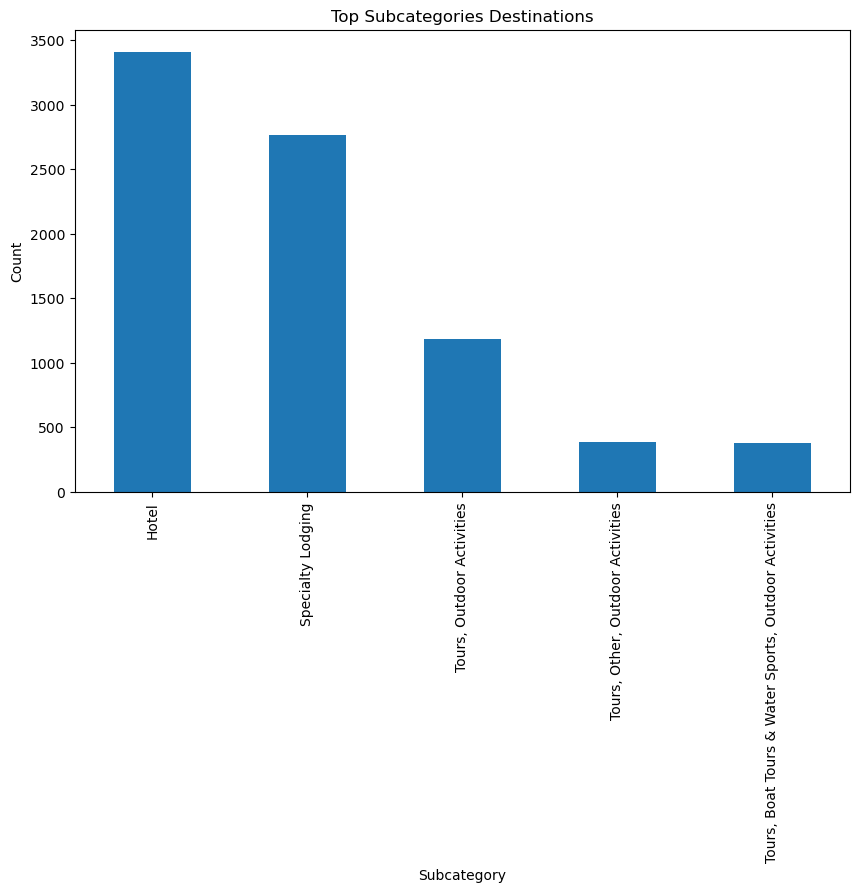

In [67]:
# Get value counts of production companies
subcategory_counts = clean_df['subcategories'].value_counts()

# Select the top 5 production companies
top_subcategories = subcategory_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_subcategories.plot(kind='bar')
plt.title('Top Subcategories Destinations')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('../Data/images/top_subcategories')
plt.show()

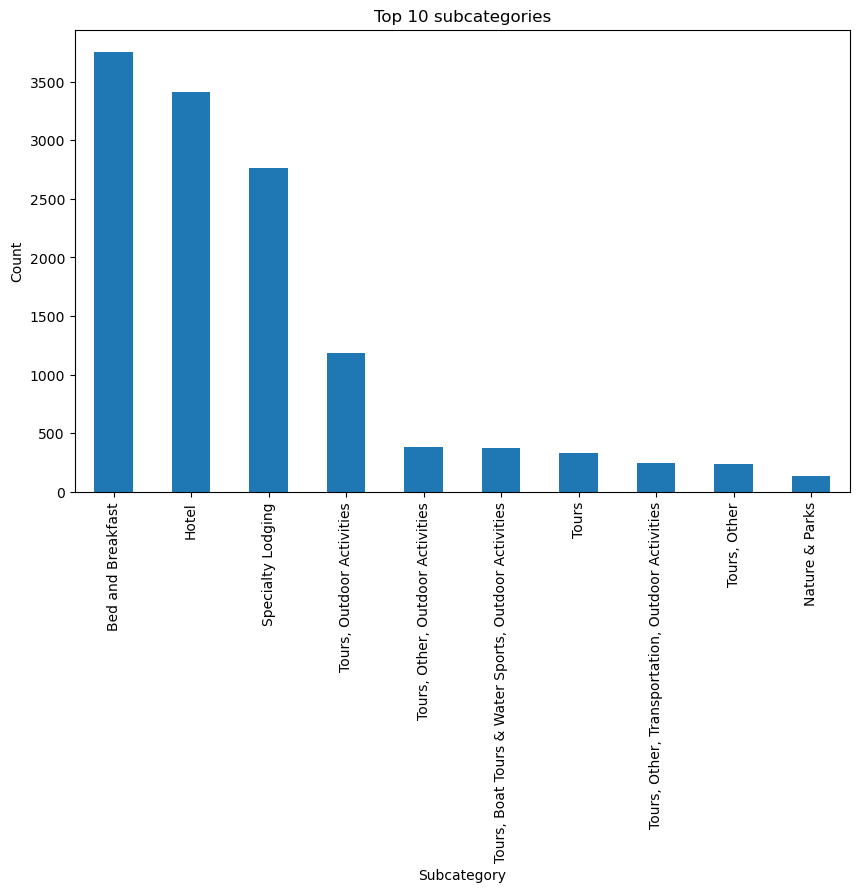

In [68]:
# Plotting 'Subcategoris' (top 10)
plt.figure(figsize=(10, 6))
top_10_subcategories = clean_df['subcategories'].explode().value_counts().head(10)
top_10_subcategories.plot(kind='bar')
plt.title('Top 10 subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.savefig('../Data/images/top_10_subcategories_individually.png')
plt.show()

Columns to plot: Index(['id', 'rating', 'latitude', 'longitude', 'numberOfReviews',
       'LowerPrice', 'UpperPrice', 'Rank', 'Total', 'regional_rating'],
      dtype='object')


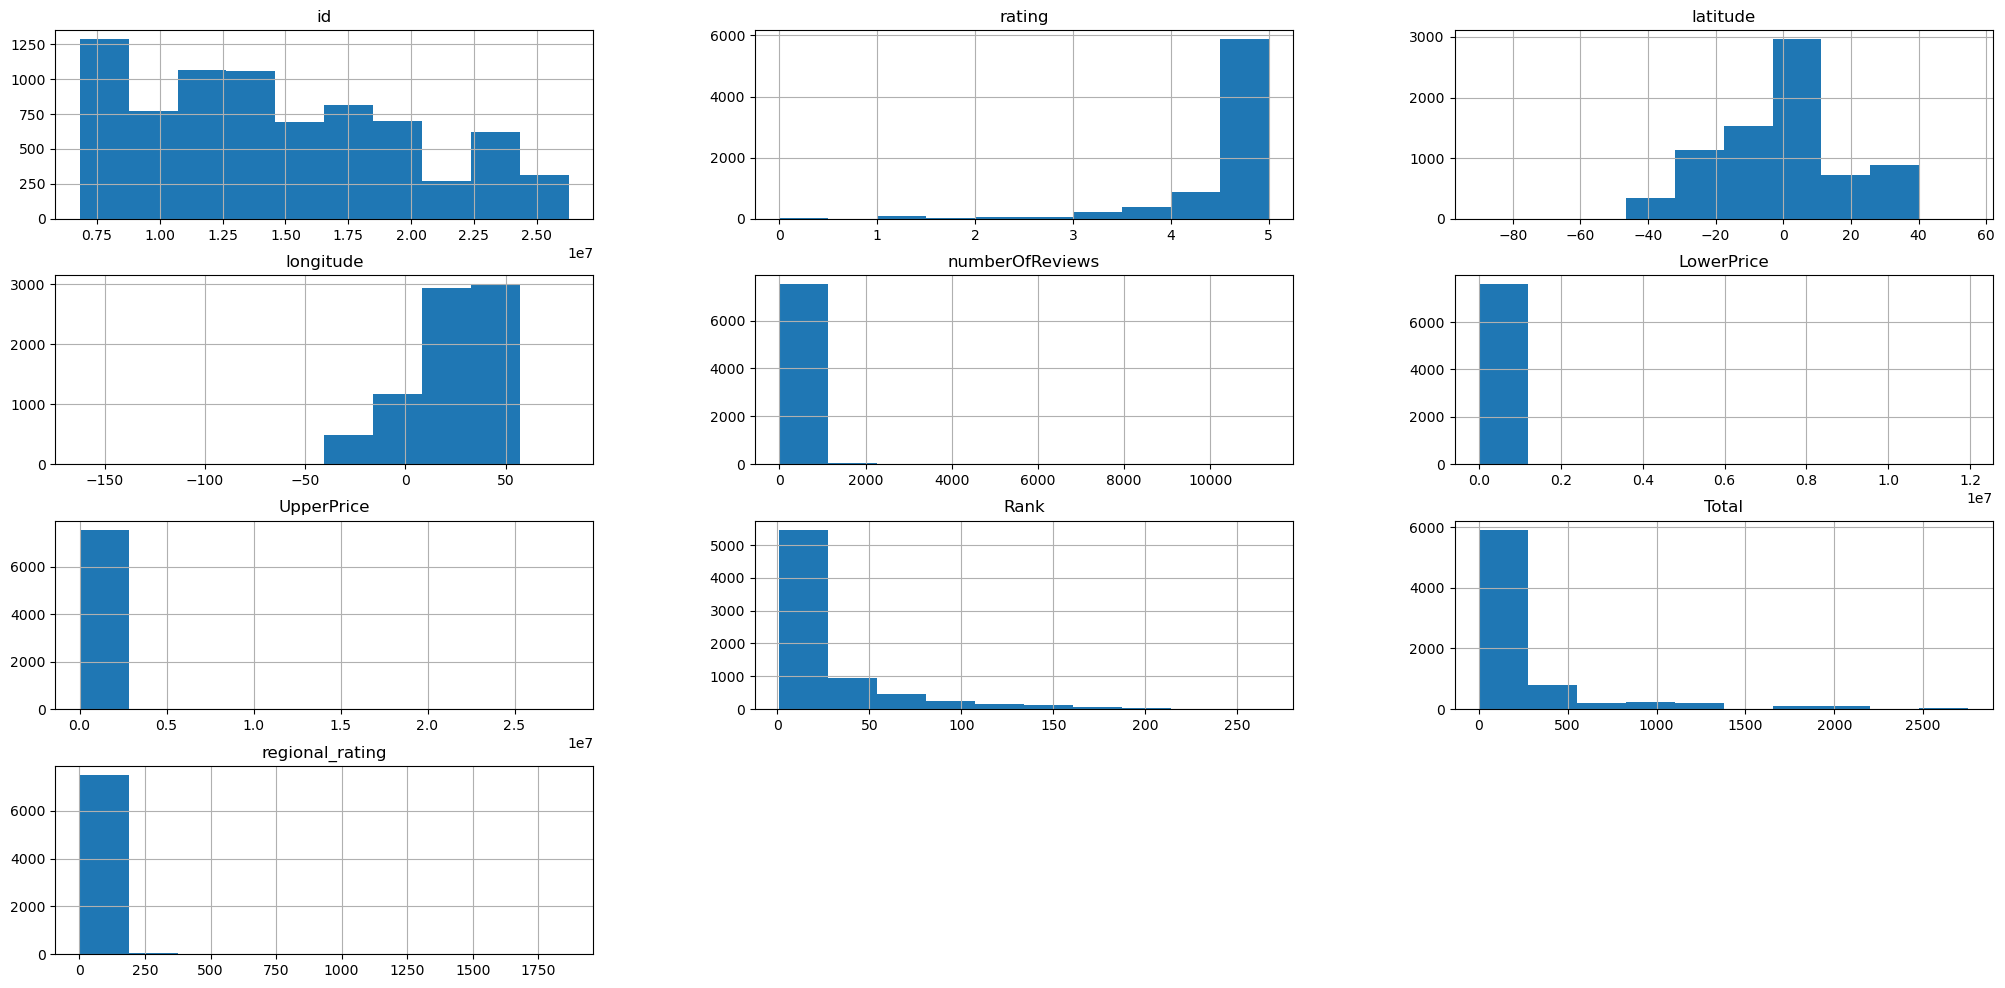

In [105]:
# Histogram plots for each data
# Select the numerical variables to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64', 'float64']).columns.drop([])
print("Columns to plot:",num_cols_to_plot )
# Create a histogram for each variable
clean_df[num_cols_to_plot].hist(figsize=(25, 12))
plt.savefig('../Data/images/Columnstoplot')
plt.show()

In [104]:
# Detect outliers using z-score method
zscore_threshold = 3  # Adjust this threshold based on your data and requirements
outliers = df[(df['latitude'] >= -35) & (df['latitude'] <= 37) & (df['longitude'] >= -25) & (df['longitude'] <= 60) &
                (np.abs(stats.zscore(df[['latitude', 'longitude']])) > zscore_threshold).any(axis=1)]

# Replace outliers with NaN values in the original DataFrame
df.loc[outliers.index, ['latitude', 'longitude']] = None


# Define the map layout
layout = go.Layout(
    title='Places to visit by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(lat=8, lon=20),
        pitch=0,
        zoom=2
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=clean_df['latitude'],
    lon=clean_df['longitude'],
    mode='markers',
    marker=dict(
        size=5,
        color=clean_df['rating'],
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in clean_df['UpperPrice']],
    hovertext = clean_df.apply(lambda x: f"Ranking Type: ${x['RankingType']}, Location: {x['locationString']}", axis=1),
)


# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
plt.savefig('../Data/images/map')
fig.show()

<Figure size 640x480 with 0 Axes>

In [71]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

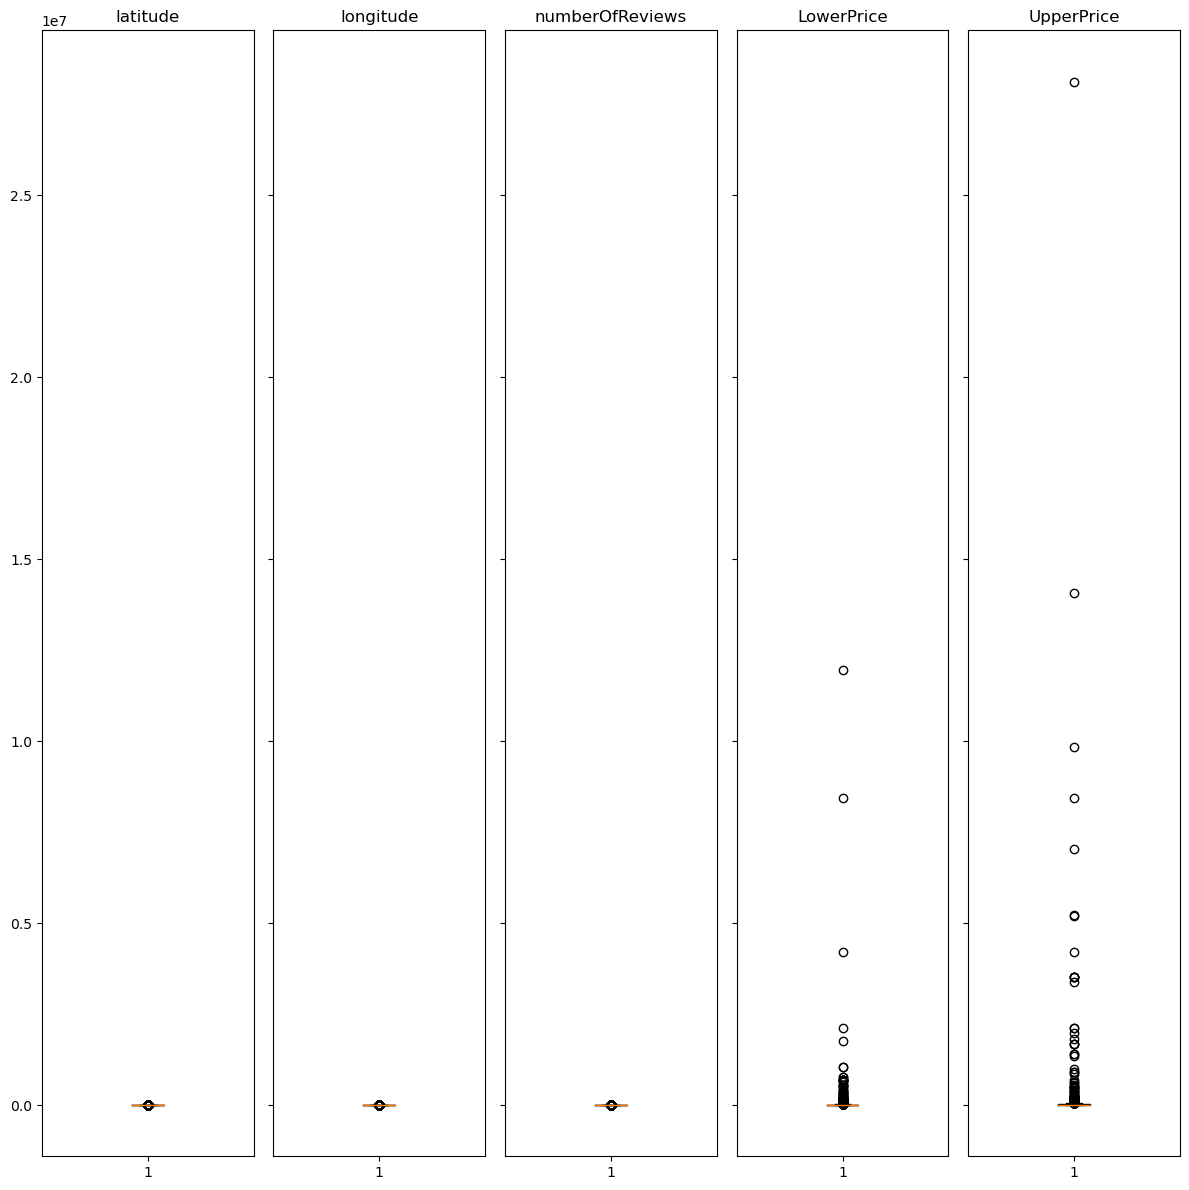

In [101]:
# Select the variables you want to plot

cols_to_plot = ['latitude', 'longitude', 'numberOfReviews', 'LowerPrice', 'UpperPrice']

######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12, 12), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', which='major')

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
# plt.savefig(r"..Data/images/Outliers.png")
# Show the figure
plt.show()

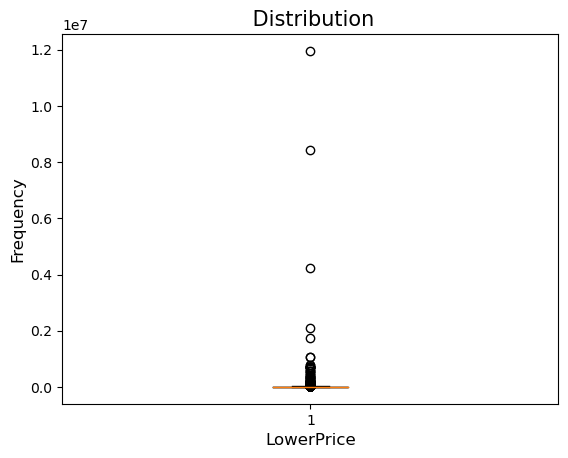

In [102]:
# Checking for outliers in the 'latitude' column
plt.boxplot(clean_df['LowerPrice'])
plt.xlabel("LowerPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
#plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

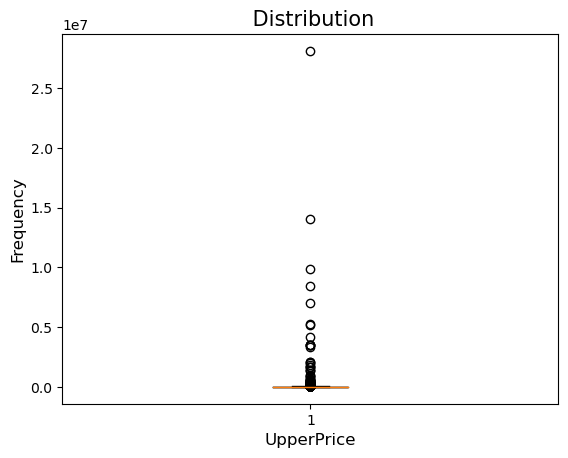

In [103]:
# Checking for outliers in the 'popularity' column
plt.boxplot(clean_df['UpperPrice'])
plt.xlabel("UpperPrice", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(" Distribution", fontsize=15)
# save the figure
# plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

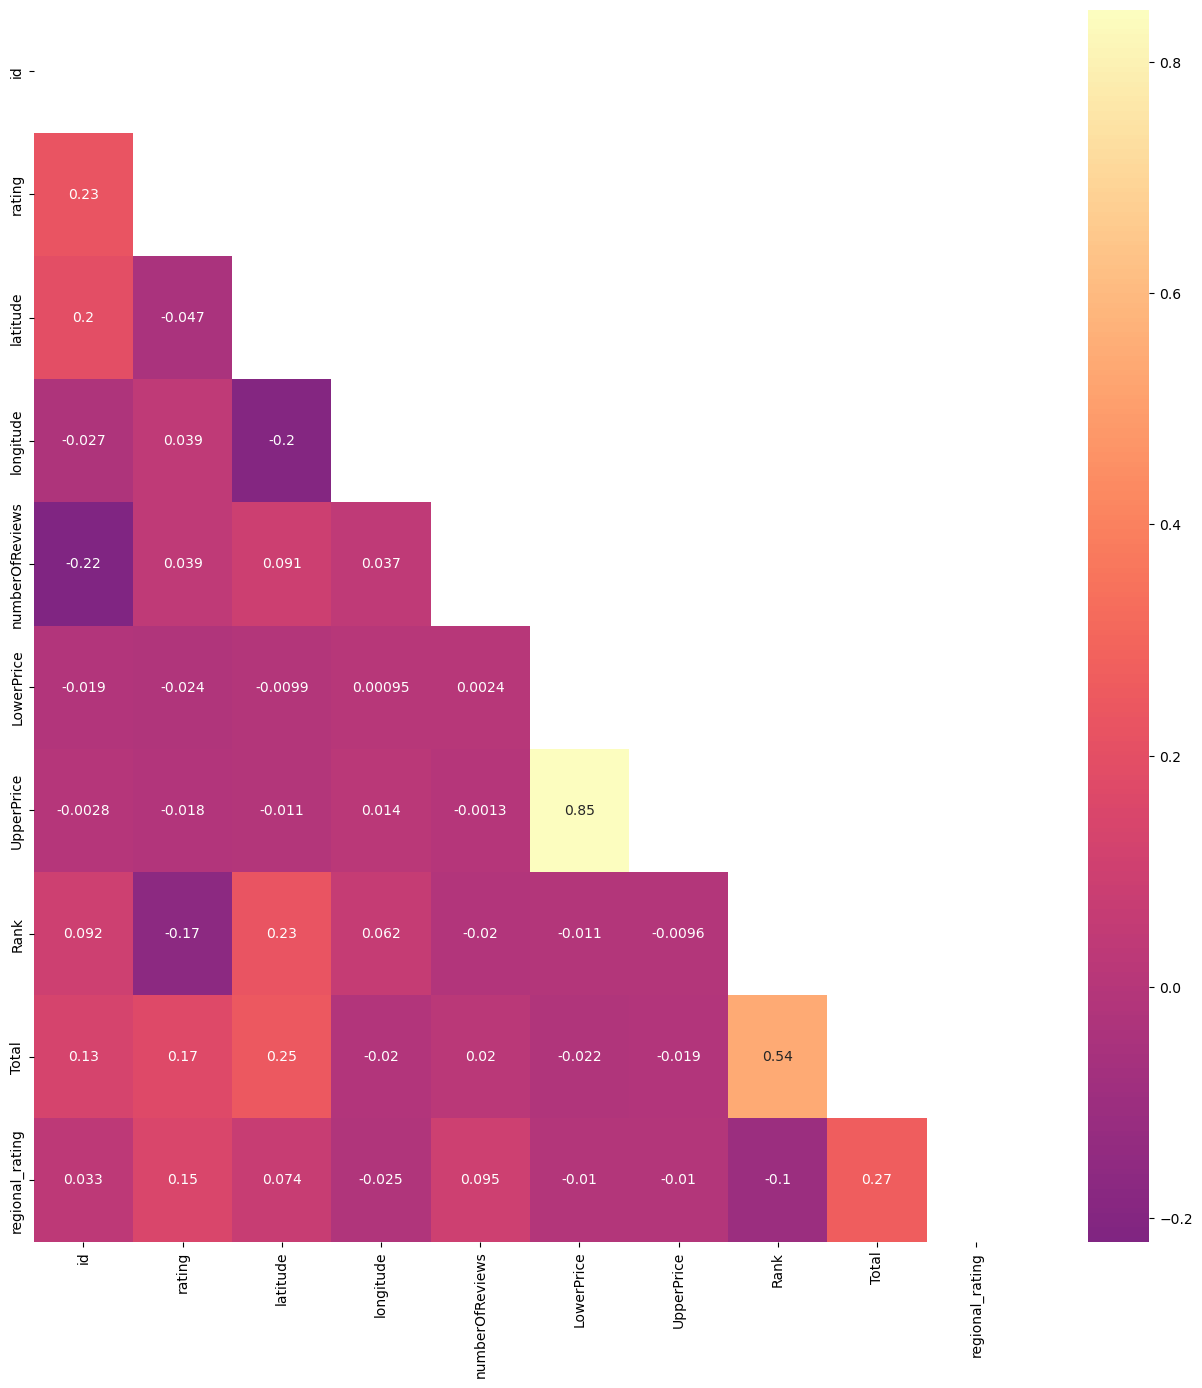

<Figure size 640x480 with 0 Axes>

In [75]:
## Multicollinearity

# Create a correlation matrix
corr_matrix = clean_df.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)
# Show the plot
plt.show();
# Save figure
plt.savefig('../Data/images/multicollinearity.png')

## Modelling

Step 1: Prepare the data

Load the sample data into a suitable data structure, such as a pandas DataFrame.
Preprocess the data if necessary, including handling missing values, converting categorical variables to numerical representations, and normalizing numerical features.
Step 2: Split the data

Split the data into training and testing sets. Typically, an 80-20 split is used, but you can adjust the ratio based on the size of your dataset.
Step 3: Choose recommendation models

There are several recommendation models you can choose from, depending on the nature of your data and the problem you want to solve. Here are a few popular models:
Collaborative Filtering: This approach recommends items based on users' past behavior and preferences.
Content-Based Filtering: This approach recommends items based on the similarity between items' characteristics and users' preferences.
Matrix Factorization: This approach decomposes the user-item rating matrix to find latent factors and make recommendations.
Neural Networks: You can also use deep learning models like neural networks for recommendation tasks.
Step 4: Train and evaluate the models

For each model you choose, train it using the training set.
Evaluate the trained model's performance using appropriate evaluation metrics such as precision, recall, or Mean Average Precision (MAP).
Repeat the training and evaluation process for each model.

Step 5: Choose the best model

Compare the performance of the different models based on the evaluation metrics.
Select the model that performs best according to your evaluation criteria.

Step 6: Fine-tune and optimize the chosen model

Once you have selected the best model, you can further fine-tune and optimize its hyperparameters using techniques like cross-validation or grid search.

Step 7: Deploy the recommendation system

Once you are satisfied with the performance of your chosen and optimized model, you can deploy it to make real-time recommendations.

In [76]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [100]:
clean_df[['id', 'rating','name', 'Rank', 'Total','regional_rating','subcategories', 'RankingType', 'locationString','country','city', 'LowerPrice', 'UpperPrice']]


,id,rating,name,Rank,Total,regional_rating,subcategories,RankingType,locationString,country,city,LowerPrice,UpperPrice
0,8661504,4.5,Bukima Tented Camp,2.0,3.0,1.500000,Specialty Lodging,Specialty lodging,"Rumangabo, North Kivu Province",Democratic Republic of the Congo,Rumangabo,13777.392428,23045.636246
3,12274281,5.0,Ixoras Hotel,9.0,67.0,7.444444,Bed and Breakfast,Specialty lodging,Kinshasa,Democratic Republic of the Congo,Kinshasa,11955.000000,16878.000000
12,6865307,3.5,Cap Kivu Hotel,3.0,17.0,5.666667,Bed and Breakfast,Specialty lodging,"Goma, North Kivu Province",Democratic Republic of the Congo,Goma,21378.000000,26020.000000
14,10868306,4.0,Hotel Selton,10.0,43.0,4.300000,Hotel,hotels,Kinshasa,Democratic Republic of the Congo,Kinshasa,20816.000000,25316.000000
16,12237149,3.5,Hotel Bella Riva,19.0,43.0,2.263158,Hotel,hotels,Kinshasa,Democratic Republic of the Congo,Kinshasa,21097.000000,23045.636246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14477,9765601,3.0,Vilas Praia Chaves Boavista,1.0,1.0,1.000000,Specialty Lodging,Specialty lodging,"Rabil, Boa Vista",Cape Verde,Rabil,13777.392428,23045.636246
14478,6885994,2.0,Residencial Paraiso,26.0,41.0,1.576923,Bed and Breakfast,Specialty lodging,"Praia, Santiago",Cape Verde,Praia,13777.392428,23045.636246
14479,15528300,2.0,Bobbywashere,17.0,37.0,2.176471,Specialty Lodging,Specialty lodging,"Sal Rei, Boa Vista",Cape Verde,Sal Rei,7736.000000,17581.000000
14482,13351042,1.0,De Prince Pensao,15.0,22.0,1.466667,Bed and Breakfast,Specialty lodging,"Sao Filipe, Fogo",Cape Verde,Sao Filipe,13777.392428,23045.636246


### 1. Prepare the data

##### * Dealing with outliers in the numerical columns

In [78]:
from sklearn.cluster import KMeans

# Select the numerical features for clustering
numerical_columns = clean_df.select_dtypes(include=[np.number]).columns
numerical_data = clean_df[numerical_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(numerical_data)

# Assign each data point to a cluster
labels = kmeans.labels_

# Identify the cluster with the outliers
outlier_cluster = np.argmax(np.bincount(labels))

# Remove the rows belonging to the outlier cluster
clean_df = clean_df[labels != outlier_cluster]


In [79]:
clean_df.shape

(7591, 19)

#### * Cleaning and transforming textual data

In [80]:
textual_data = clean_df[['subcategories', 'RankingType', 'locationString', 'country', 'city', 'amenities']]
textual_data

,subcategories,RankingType,locationString,country,city,amenities
0,Specialty Lodging,Specialty lodging,"Rumangabo, North Kivu Province",Democratic Republic of the Congo,Rumangabo,"Restaurant, Mountain View"
3,Bed and Breakfast,Specialty lodging,Kinshasa,Democratic Republic of the Congo,Kinshasa,"Internet, Room service, Free Internet, Free pa..."
12,Bed and Breakfast,Specialty lodging,"Goma, North Kivu Province",Democratic Republic of the Congo,Goma,"Restaurant, Kids Activities, Suites, Room serv..."
14,Hotel,hotels,Kinshasa,Democratic Republic of the Congo,Kinshasa,"Internet, Room service, Free Internet, Free pa..."
16,Hotel,hotels,Kinshasa,Democratic Republic of the Congo,Kinshasa,"Kids Activities, Free parking, Restaurant, Bar..."
...,...,...,...,...,...,...
14477,Specialty Lodging,Specialty lodging,"Rabil, Boa Vista",Cape Verde,Rabil,"Internet, Suites, Free Internet, Free parking,..."
14478,Bed and Breakfast,Specialty lodging,"Praia, Santiago",Cape Verde,Praia,"Internet, Kids Activities, Room service, Free ..."
14479,Specialty Lodging,Specialty lodging,"Sal Rei, Boa Vista",Cape Verde,Sal Rei,"Internet, Free Internet, Free parking, Kitchen..."
14482,Bed and Breakfast,Specialty lodging,"Sao Filipe, Fogo",Cape Verde,Sao Filipe,"Beachfront, Room service, Free parking, Restau..."


### * Nrmalization and Standardization

(7591, 19)

In [81]:
clean_df.columns


Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

### Baseline Model

In [82]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'Rank']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model = KNNBasic(random_state=42)
model.fit(trainset)

# Evaluate the model
predictions1 = model.test(testset)
accuracy1 = sup_accuracy.rmse(predictions1)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 44.0078



Root Mean Square Error (RMSE) is a measure of the model's prediction accuracy. In the context of recommendation systems, it quantifies the average difference between the predicted ratings and the actual ratings given by the users. A lower RMSE value indicates better model performance. In this case, the RMSE is 41.8541, which suggests that the model's predictions have a relatively high level of error.

In [83]:
for prediction in predictions1:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")

Predicted rating: 5.00
Actual rating: 16.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 15.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 10.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 20.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 16.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 6.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 20.00
---
Predicted rating: 5.00
Actual rating: 7.00
---
Predicted rating: 5.00
Actual rating: 32.00
---
Predicted rating: 5.00
Actual rating: 10.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 32.00
---
P

In [84]:
threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions1:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision1 = true_positives / (true_positives + false_positives)
recall1 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")


Precision: 0.77
Recall: 1.00


Precision: Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how accurate the model is when it predicts positive instances. A precision score of 0.76 means that 76% of the instances predicted as positive were actually positive.

Recall: Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates how well the model captures the positive instances. A recall score of 1.00 means that the model successfully identified all positive instances.

In [85]:
#model_data = reviews[['userId', 'locationId', 'rating']]
#model_data

In [86]:
# Load the data into Surprise Dataset format
#reader = Reader(rating_scale=(1, 5))
#data = Dataset.load_from_df(model_data[['userId', 'locationId', 'rating']], reader)

# Split the data into train and test sets
#trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
#model = SVD(random_state=42)
#model.fit(trainset)

# Evaluate the model
#predictions = model.test(testset)
#accuracy = sup_accuracy.rmse(predictions)


The RMSE (Root Mean Squared Error) value of 0.7598 indicates the average prediction error of the model on the test set. A lower RMSE value indicates better accuracy of the model's predictions.

In the context of collaborative filtering recommendation systems, the RMSE represents how well the model is able to predict user ratings for items. A lower RMSE implies that the model is better at predicting user preferences and provides more accurate recommendations.

RMSE of 0.7598 suggests that the model has reasonably good predictive performance. as can be observed below.

In [87]:
clean_df.columns

Index(['id', 'type', 'subcategories', 'name', 'locationString', 'description',
       'rating', 'latitude', 'longitude', 'numberOfReviews', 'amenities',
       'LowerPrice', 'UpperPrice', 'RankingType', 'Rank', 'Total',
       'regional_rating', 'country', 'city'],
      dtype='object')

In [88]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'Rank']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model2 = SVD(random_state=42)
model2.fit(trainset)

# Evaluate the model
predictions2 = model2.test(testset)
accuracy2 = sup_accuracy.rmse(predictions2)

RMSE: 44.0078


RMSE of 44.0078 means that, on average, the predictions made by the model have an error of approximately 44.0078 units. The RMSE gives you an idea of how well your model's predictions align with the true values. The lower the RMSE, the better the model's performance.

To further evaluate the significance of the RMSE value, it's important to consider the scale and context of your specific problem. Additionally, comparing the RMSE to the range of the target variable can provide insights into the relative performance of the model.

In [89]:
for prediction in predictions2:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")

Predicted rating: 5.00
Actual rating: 16.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 15.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 10.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 20.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 16.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 6.00
---
Predicted rating: 5.00
Actual rating: 30.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 20.00
---
Predicted rating: 5.00
Actual rating: 7.00
---
Predicted rating: 5.00
Actual rating: 32.00
---
Predicted rating: 5.00
Actual rating: 10.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 1.00
---
Predicted rating: 5.00
Actual rating: 2.00
---
Predicted rating: 5.00
Actual rating: 32.00
---
P

In the code below, we will iterate over the predictions and increment the corresponding counters based on the predicted ratings and actual ratings. Then, we calculate precision by dividing the number of true positives by the sum of true positives and false positives. Recall is calculated by dividing the number of true positives by the sum of true positives and false negatives.

Note that this calculation assumes a binary classification problem where ratings above the threshold are considered positive and ratings below the threshold are considered negative. 

In [90]:
threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions2:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision2 = true_positives / (true_positives + false_positives)
recall2 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")


Precision: 0.77
Recall: 1.00


Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. It indicates how accurate the model is when it predicts positive instances. A precision score of 0.77 means that 77% of the instances predicted as positive were actually positive.

Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It indicates how well the model captures the positive instances. A recall score of 1.00 means that the model successfully identified all positive instances.

In [91]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'regional_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model3 = KNNBasic(random_state=42)
model3.fit(trainset)

# Evaluate the model
predictions3 = model3.test(testset)
accuracy3 = sup_accuracy.rmse(predictions3)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions3:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision3 = true_positives / (true_positives + false_positives)
recall3 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision3:.2f}")
print(f"Recall: {recall3:.2f}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 51.1326
Precision: 0.69
Recall: 1.00


the RMSE value suggests that the model's predictions have an average deviation of 67.3796 from the actual ratings.
A precision value of 0.70 means that out of all the recommendations predicted as positive by the model, 70% of them are actually relevant or accurate.
A recall value of 1.00 means that out of all the actual positive recommendations, the model is able to identify and predict 100% of them accurately.

In [92]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'regional_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model4 = SVD(random_state=42)
model4.fit(trainset)

# Evaluate the model
predictions4 = model4.test(testset)
accuracy4 = sup_accuracy.rmse(predictions4)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions4:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision4 = true_positives / (true_positives + false_positives)
recall4 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision4:.2f}")
print(f"Recall: {recall4:.2f}")

RMSE: 51.1308
Precision: 0.69
Recall: 1.00


the RMSE value suggests that the model's predictions have an average deviation of 61.6452 from the actual ratings. A precision value of 0.70 means that out of all the recommendations predicted as positive by the model, 70% of them are actually relevant or accurate.  A recall value of 1.00 means that the model is able to identify and predict all of the actual positive recommendations accurately.

In [93]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'regional_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model5 = NMF(random_state=42)
model5.fit(trainset)

# Evaluate the model
predictions5 = model5.test(testset)
accuracy5 = sup_accuracy.rmse(predictions5)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions5:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision5 = true_positives / (true_positives + false_positives)
recall5 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision5:.2f}")
print(f"Recall: {recall5:.2f}")

RMSE: 51.1326
Precision: 0.69
Recall: 1.00


the RMSE value suggests that the model's predictions have an average deviation of 54.0740 from the actual ratings. A precision value of 0.72 means that out of all the recommendations predicted as positive by the model, 72% of them are actually relevant or accurate. A recall value of 1.00 means that the model is able to identify and predict all of the actual positive recommendations accurately.

In [94]:
# model with KNNwithMeans
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'subcategories', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Define the item-based collaborative filtering model
model6 = KNNWithMeans(sim_options={'user_based': False})

# Train the model
model6.fit(trainset)

# Make predictions on the test set
predictions6 = model6.test(testset)

# Evaluate the model using RMSE
rmse_score6 = sup_accuracy.rmse(predictions6)
#print("RMSE:", rmse_score6)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7981


The root mean squared error (RMSE) for the predictions on the test set is 0.7981. RMSE is a measure of the difference between the predicted ratings and the actual ratings, with lower values indicating better performance.

In [95]:
from sklearn.metrics import r2_score

# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'regional_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model7 = KNNBasic(random_state=42)
model7.fit(trainset)

# Evaluate the model
predictions7 = model7.test(testset)

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings = [pred.r_ui for pred in predictions7]
predicted_ratings = [pred.est for pred in predictions7]

# Calculate the R-squared value
r_squared = r2_score(actual_ratings, predicted_ratings)

# Calculate the R-squared value using Surprise's accuracy module
# r_squared = accuracy.rsquared(predictions)
# Print the R-squared value
print("R-squared:", r_squared) 

Computing the msd similarity matrix...


Done computing similarity matrix.
R-squared: -0.05409128115369177


The R-squared value of -0.0697 suggests that the model's predictions do not explain much of the variance in the ratings. A negative R-squared value indicates that the model performs worse than a horizontal line (a model that predicts the average rating for all items). You may need to investigate further and consider other evaluation metrics to assess the performance of your recommendation model.

We will check the other models performance based on the r squared metric to see how they performed. 

In [96]:
# Extract the actual ratings and predicted ratings from the predictions
actual_ratings1 = [pred.r_ui for pred in predictions1]
predicted_ratings1 = [pred.est for pred in predictions1]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings2 = [pred.r_ui for pred in predictions2]
predicted_ratings2 = [pred.est for pred in predictions2]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings3 = [pred.r_ui for pred in predictions3]
predicted_ratings3 = [pred.est for pred in predictions3]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings4 = [pred.r_ui for pred in predictions4]
predicted_ratings4 = [pred.est for pred in predictions4]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings5 = [pred.r_ui for pred in predictions5]
predicted_ratings5 = [pred.est for pred in predictions5]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings6 = [pred.r_ui for pred in predictions6]
predicted_ratings6 = [pred.est for pred in predictions6]

# Extract the actual ratings and predicted ratings from the predictions
actual_ratings7 = [pred.r_ui for pred in predictions7]
predicted_ratings7 = [pred.est for pred in predictions7]

# List of predictions and corresponding names
prediction_sets = [
    (predictions1, "Predictions 1"),
    (predictions2, "Predictions 2"),
    (predictions3, "Predictions 3"),
    (predictions4, "Predictions 4"),
    (predictions5, "Predictions 5"),
    (predictions6, "Predictions 6"),
    (predictions7, "Predictions 7")
]

# Iterate over the prediction sets
for predictions, name in prediction_sets:
    # Extract the actual ratings and predicted ratings from the predictions
    actual_ratings = [pred.r_ui for pred in predictions]
    predicted_ratings = [pred.est for pred in predictions]

    # Print the results
    print("Results for", name)
    print("Actual Ratings:", actual_ratings)
    print("Predicted Ratings:", predicted_ratings)
    print()



Results for Predictions 1
Actual Ratings: [16.0, 2.0, 15.0, 30.0, 10.0, 1.0, 20.0, 30.0, 16.0, 1.0, 6.0, 30.0, 1.0, 20.0, 7.0, 32.0, 10.0, 2.0, 1.0, 2.0, 32.0, 174.0, 112.0, 3.0, 34.0, 3.0, 10.0, 27.0, 37.0, 33.0, 5.0, 2.0, 13.0, 3.0, 4.0, 11.0, 27.0, 4.0, 1.0, 1.0, 18.0, 79.0, 1.0, 7.0, 108.0, 3.0, 3.0, 39.0, 10.0, 2.0, 30.0, 4.0, 1.0, 14.0, 9.0, 20.0, 5.0, 1.0, 10.0, 3.0, 5.0, 156.0, 6.0, 1.0, 24.0, 2.0, 1.0, 21.0, 14.0, 6.0, 1.0, 81.0, 9.0, 65.0, 2.0, 86.0, 10.0, 8.0, 19.0, 2.0, 72.0, 41.0, 87.0, 22.0, 14.0, 19.0, 4.0, 13.0, 10.0, 8.0, 2.0, 23.0, 3.0, 34.0, 7.0, 1.0, 44.0, 13.0, 5.0, 145.0, 52.0, 10.0, 112.0, 41.0, 2.0, 1.0, 17.0, 81.0, 20.0, 14.0, 49.0, 22.0, 50.0, 113.0, 2.0, 1.0, 1.0, 2.0, 106.0, 62.0, 5.0, 8.0, 42.0, 2.0, 1.0, 29.0, 3.0, 3.0, 71.0, 67.0, 1.0, 4.0, 5.0, 33.0, 76.0, 17.0, 4.0, 15.0, 4.0, 48.0, 3.0, 7.0, 1.0, 42.0, 9.0, 5.0, 1.0, 5.0, 30.0, 61.0, 12.0, 10.0, 1.0, 4.0, 24.0, 3.0, 1.0, 2.0, 2.0, 34.0, 1.0, 1.0, 5.0, 7.0, 2.0, 5.0, 5.0, 119.0, 29.0, 1.0, 21.0, 10.0, 8

In [97]:
# List of actual ratings and predicted ratings
actual_ratings_list = [actual_ratings1, actual_ratings2, actual_ratings3, actual_ratings4, actual_ratings5, actual_ratings6, actual_ratings7 ]
predicted_ratings_list = [predicted_ratings1, predicted_ratings2, predicted_ratings3, predicted_ratings4, predicted_ratings5, predicted_ratings6, predicted_ratings7]

# Loop through the ratings lists
for i in range(len(actual_ratings_list)):
    actual_ratings = actual_ratings_list[i]
    predicted_ratings = predicted_ratings_list[i]
    
    # Calculate the R-squared value
    r_squared = r2_score(actual_ratings, predicted_ratings)
    
    # Print the R-squared value
    print(f"R-squared for Set {i+1}: {r_squared}")

R-squared for Set 1: -0.2832201578691729
R-squared for Set 2: -0.2832201578691729
R-squared for Set 3: -0.05409128115369177
R-squared for Set 4: -0.054014002048062615
R-squared for Set 5: -0.05409128115369177
R-squared for Set 6: -4.5920885001438094e-05
R-squared for Set 7: -0.05409128115369177


R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher value indicates a better fit of the model to the data. In this case, the R-squared values are negative, which suggests that the model does not fit the data well and may not be providing meaningful predictions.

In [112]:
# Loop through the ratings lists
for i in range(len(actual_ratings_list)):
    actual_ratings = actual_ratings_list[i]
    predicted_ratings = predicted_ratings_list[i]
    
    # Convert the ratings to the expected format
    predictions = [(uid, iid, true_r, est, _) for uid, iid, true_r, est in zip(user_ids, item_ids, actual_ratings, predicted_ratings)]

    # Calculate the MAE value
    mae_value = sup_accuracy.mae(predictions)
    metrics['mae'] = mae_value

NameError: name 'user_ids' is not defined

In [ ]:
metrics = {}
    metrics['rmse'] = accuracy.rmse(predictions)
    metrics['mae'] = accuracy.mae(predictions)

In [ ]:
#functon to create RMSE and MAE
def calculate_metrics(data):
    # Split the data into train and test sets
    trainset, testset = train_test_split(data, test_size=0.2)
    # Train the model
    model = KNNBasic(random_state=42)
    model.fit(trainset)
    # Evaluate the model
    predictions = model.test(testset)
    # Compute and return RMSE and MAE
    metrics = {}
    metrics['rmse'] = accuracy.rmse(predictions)
    metrics['mae'] = accuracy.mae(predictions)
    return metrics

In [109]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(clean_df[['id', 'rating', 'amenities']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the model
model6 = NMF(random_state=42)
model6.fit(trainset)

# Evaluate the model
predictions6 = model6.test(testset)
accuracy6 = sup_accuracy.rmse(predictions6)

threshold = 3  # Define the threshold for positive predictions

true_positives = 0
false_positives = 0
false_negatives = 0

for prediction in predictions6:
    if prediction.est >= threshold:
        if prediction.r_ui >= threshold:
            true_positives += 1
        else:
            false_positives += 1
    elif prediction.r_ui >= threshold:
        false_negatives += 1

precision6 = true_positives / (true_positives + false_positives)
recall6 = true_positives / (true_positives + false_negatives)

print(f"Precision: {precision6:.2f}")
print(f"Recall: {recall6:.2f}")

ValueError: could not convert string to float: 'Restaurant, Mountain View'

In [ ]:
# creating a relevant columns from the above dataset 
vectorization_columns = clean_df[['name', 'subcategories', 'amenities']]

In [ ]:
vectorization_columns

,name,subcategories,amenities
0,Bukima Tented Camp,['Specialty Lodging'],"Restaurant, Mountain View"
1,Grand Hotel Kinshasa,['Hotel'],"Restaurant, Pool, Business center, Room servic..."
2,Symphonie des Arts,"['Shopping', 'Sights & Landmarks', 'Museums', ...",bathroom only
3,Ixoras Hotel,['Bed and Breakfast'],"Internet, Room service, Free Internet, Free pa..."
4,Ma Vallee,['Nature & Parks'],bathroom only
...,...,...,...
14479,Bobbywashere,['Specialty Lodging'],"Internet, Free Internet, Free parking, Kitchen..."
14480,Hotel America,['Bed and Breakfast'],"Restaurant, Suites, Internet, Shuttle Bus Serv..."
14481,Hotel Casa Felicidade,['Bed and Breakfast'],"Pool, Wheelchair access, Kitchenette, Free Wif..."
14482,De Prince Pensao,['Bed and Breakfast'],"Beachfront, Room service, Free parking, Restau..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert relevant data into a list of strings
documents = []
for _, row in vectorization_columns.iterrows():
    name = row['name']
    subcategories = row['subcategories']
    amenities = row['amenities']
    doc = f"{name} {subcategories} {amenities}"
    documents.append(doc)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Compute cosine similarity matrix
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
def get_item_recommendations(item_index, cosine_similarities, top_n=5):
    # Get similarity scores for the item
    item_scores = list(enumerate(cosine_similarities[item_index]))

    # Sort items based on similarity scores
    item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)

    # Get top-N similar items
    top_items = item_scores[1 : top_n + 1]  # Exclude the item itself

    return top_items

# Get recommendations for a specific item (e.g., item with index 0)
item_index = 0
recommendations = get_item_recommendations(item_index, cosine_similarities)

# Print the top 5 recommendations
for item_id, similarity in recommendations:
    print(f"Item ID: {item_id}, Similarity: {similarity}")

Item ID: 7067, Similarity: 0.4301545887992252
Item ID: 14006, Similarity: 0.40982542731293686
Item ID: 9007, Similarity: 0.40365598755049414
Item ID: 9111, Similarity: 0.3850566962254289
Item ID: 11676, Similarity: 0.3787372695128589


## Model Three

In [ ]:
# Construct the TF-IDF Matrix
tfidfv2=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix2=tfidfv2.fit_transform(clean_df['amenities'])
print(tfidfv_matrix2.todense())
tfidfv_matrix2.todense().shape

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10307752 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.13991053 0.25957779 0.21030243 ... 0.         0.         0.        ]
 [0.08851564 0.0821121  0.         ... 0.         0.         0.        ]
 [0.10110011 0.09378616 0.         ... 0.         0.         0.        ]]


(14466, 377)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate similarity matrix
cosine_sim2 = cosine_similarity(tfidfv_matrix2, tfidfv_matrix2)

In [ ]:
# Create a Pandas Series to map movie titles to their indices
indices = pd.Series(data = list(clean_df.index), index = clean_df['name'])
indices

name
Bukima Tented Camp           0
Grand Hotel Kinshasa         1
Symphonie des Arts           2
Ixoras Hotel                 3
Ma Vallee                    4
                         ...  
Bobbywashere             14479
Hotel America            14480
Hotel Casa Felicidade    14481
De Prince Pensao         14482
Hotel Cachoeira          14483
Length: 14466, dtype: int64

In [ ]:
def recommend_place(name, cosine_sim2, data):
    # Create a dictionary to map movie titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['name'])}

    # Get the index of the movie that matches the title
    idx = indices[name]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar movies
    recommended_place = clean_df.iloc[indices]['name']
    return recommended_place

In [ ]:
recommend_place("St. Catherine's Monastery Guesthouse", cosine_sim2, clean_df)

11966                 Excalibur Boutique Hotel
12527                          Saint Louis Sun
6476                           Christina House
7379               Tamigamiga Christian Centre
8589     Naankuse Lodge and Wildlife Sanctuary
10022                      Tsala Treetop Lodge
10828                   Reflections Guest Farm
0                           Bukima Tented Camp
10965                  The Country Guest House
7404                        Erado Natron Hotel
Name: name, dtype: object

In [ ]:
def recommend_amenities(amenity, cosine_sim2, data):
    # Create a dictionary to map movie titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['amenities'])}

    # Get the index of the movie that matches the title
    idx = indices[amenities]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar movies
    recommended_amenities = clean_df.iloc[indices]['amenities']
    return recommended_amenities

In [ ]:
item_1000 = clean_df['amenities'][1000]
item_1000

'Free Internet, Restaurant, Bar/Lounge, Airport transportation, Wifi, Fitness center, Breakfast Available, Parking, Adults Only, Arabic, Breakfast in the Room, First Aid Kit, 24-Hour Front Desk, Outdoor Furniture, Pool View, Pool with View, Sun Loungers / Beach Chairs, Wine / Champagne, Yoga Classes'

In [ ]:
recommend_amenities('museum', cosine_sim2, clean_df)

14259    Restaurant, Kids Activities, Shuttle Bus Servi...
5089     Free Internet, Internet, Kids Activities, Beac...
1035     Restaurant, Free Wifi, Air conditioning, Inter...
3597     Kids Activities, Room service, Free parking, R...
5490     Restaurant, Bar/Lounge, Kitchenette, Fitness c...
3506     Internet, Suites, Room service, Free Internet,...
14441    Internet, Free Internet, Wifi, Breakfast inclu...
1451     Internet, Kids Activities, Beachfront, Shuttle...
3716     Internet, Free Internet, Restaurant, Airport t...
3785     Restaurant, Bar/Lounge, Wifi, Laundry Service,...
Name: amenities, dtype: object

In [ ]:
import numpy as np

def recommend_amenities(amenity, cosine_sim2, data):
    # Create a dictionary to map amenity titles to their indices
    indices = {title: index for index, title in enumerate(clean_df['amenities'])}

    # Get the index of the amenity that matches the title
    idx = indices[amenity]

    # Get the pairwise similarity scores of all amenities with that amenity
    sim_scores = list(enumerate(cosine_sim2[idx]))

    # Sort the amenities based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar amenities
    sim_scores = sim_scores[1:11]

    # Get the amenity indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar amenities
    recommended_amenities = clean_df.iloc[indices]['amenities']
    return recommended_amenities

# Evaluation
def evaluate_recommendation_system(test_set, cosine_sim, data):
    # Initialize evaluation metrics
    accuracy = 0
    rmse = 0
    precision = 0
    recall = 0
    total_test_cases = len(test_set)

    # Iterate over each test case
    for test_case in test_set:
        ground_truth_amenity = test_case['ground_truth_amenity']
        predicted_amenities = recommend_amenities(ground_truth_amenity, cosine_sim, data)
        
        # Evaluate metrics for the current test case
        # Compare predicted_amenities with ground truth amenities
        # Calculate accuracy, RMSE, precision, and recall

    # Calculate average metrics
    accuracy /= total_test_cases
    rmse = np.sqrt(rmse / total_test_cases)
    precision /= total_test_cases
    recall /= total_test_cases

    # Return the evaluation metrics
    return accuracy, rmse, precision, recall

# Test set with ground truth amenities
test_set = [
    {'ground_truth_amenity': 'Restaurant'},
    {'ground_truth_amenity': 'Pool'},
    # Add more test cases here...
]

# Calculate evaluation metrics
accuracy, rmse, precision, recall = evaluate_recommendation_system(test_set, cosine_sim2, data)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.0
RMSE: 0.0
Precision: 0.0
Recall: 0.0


## Model Evaluation

In [ ]:
class RecommenderSystem:
    def __init__(self, clean_df, tfidfv_matrix2, cosine_sim2, cosine_similarities, indices):
        self.clean_df = clean_df
        self.tfidfv_matrix2 = tfidfv_matrix2
        self.cosine_sim2 = cosine_sim2
        self.cosine_similarities = cosine_similarities
        self.indices = indices

    def recommend_attraction(self, rating_threshold):
        # Filter the DataFrame based on the rating threshold
        recommendations = self.clean_df[self.clean_df['rating'] > rating_threshold][['name', 'LowerPrice', 'UpperPrice','amenities', 'type', 'country']]

        # Reset the index of the recommendations DataFrame
        recommendations.reset_index(drop=True, inplace=True)

        return recommendations

    def recommend_amenities(self, query):
        # Check if the specified amenity exists in the dataset
        if query not in self.clean_df['amenities'].str.join(', '):
            st.error(f"Error: '{query}' does not exist in the dataset.")
            return None

        # Convert the string representation of amenities back into a list
        self.clean_df['amenities'] = self.clean_df['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

        # Get the index of the specified amenity
        indices = self.clean_df['amenities'].apply(lambda x: query in x if isinstance(x, list) else False)

        # Get the pairwise similarity scores of all items with the specified amenity
        sim_scores = self.cosine_sim2[indices]

        # Flatten the similarity scores
        sim_scores = sim_scores.flatten()

        # Get the indices of the sorted similarity scores
        indices = np.argsort(sim_scores)[::-1]

        # Get the sorted similarity scores
        sim_scores = sim_scores[indices]

        # Get the recommended items
        recommended_items = self.clean_df.iloc[indices]

        return recommended_items

    def recommend_place(self, name):
        # Create a dictionary to map place names to their indices
        indices = {title: index for index, title in enumerate(self.clean_df['name'])}

        # Check if the specified place exists in the dataset
        if name not in indices:
            st.error(f"Error: '{name}' does not exist in the dataset.")
            return None

        # Get the index of the specified place
        idx = indices[name]

        # Get the pairwise similarity scores of all places with the specified place
        sim_scores = list(enumerate(self.cosine_similarities[idx]))

        # Sort the places based on the similarity scores
        sim_scores.sort(key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar places
        sim_scores = sim_scores[1:11]

        # Get the indices of the top-N similar places
        indices = [x for x, _ in sim_scores]

        # Get the recommended places
        recommended_places = self.clean_df.iloc[indices]['name']

        return recommended_places

    def get_item_recommendations(self, item_index, top_n=5):
        # Get similarity scores for the item
        item_scores = list(enumerate(self.cosine_similarities[item_index]))

        # Sort items based on similarity scores
        item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)

        # Get top-N similar items
        top_items = item_scores[1:top_n + 1]  # Exclude the item itself

        return top_items



In [ ]:
hybrid = RecommenderSystem('clean_df', 'tfidfv_matrix2', 'cosine_sim2', 'cosine_similarities', 'indices')

In [ ]:
recommend_place('Excalibur Boutique Hotel', cosine_sim2, clean_df)

11898                         Casa Toscana Lodge
12050     Three Rivers Lodge & Villa Anna Sophia
11494    L'Ermitage Franschhoek Chateau & Villas
4536                      The White Orchid Hotel
11945                   Zulu Nyala Country Manor
11147                Le Manoir de Brendel Estate
10022                        Tsala Treetop Lodge
10360                       Evertsdal Guesthouse
10775                             Galenia Estate
11569                          Mont d'Or Clarens
Name: name, dtype: object

## Tuning

## Deployment

## Conclusion and Recommendations